In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from vae.utils import read_cifar_data, read_atari_observations
import numpy as np
import pandas as pd
import os
os.chdir("vae")

In [2]:
# data=read_cifar_data([2])
data=read_atari_observations()

In [5]:
data.shape

(50155, 84, 84, 4)

In [3]:
from VAE import VariationalAutoencoder

/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [4]:
vae=VariationalAutoencoder((84,84,4), [(32, 8, 4), (64, 4, 2), (64, 3, 1)],[], 128, 1e-3, use_shared_weights=False)
# vae=VariationalAutoencoder((84,84,4), [(64, 8, 2), (128, 6, 3), (128, 4, 2), (128, 3, 1)], [1000], 128, 1e-3, use_shared_weights=False)

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/VAE.py:27: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/VAE.py:89: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/VAE.py:200: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/VAE.py:257: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/VAE.py:33: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/VAE.py:35: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession 

In [26]:
lcurve=pd.read_csv("small CNN, 64/cost_record.csv")

In [12]:
lcurve_1=pd.read_csv("runs/small CNN, 128/cost_record.csv")

In [13]:
lcurve_2=pd.read_csv("runs/large CNN, 128/cost_record.csv")

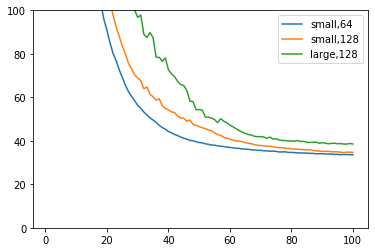

In [27]:
plt.plot(lcurve.Epoch, lcurve["training_cost"],label="small,64")
plt.plot(lcurve_1.Epoch, lcurve_1["training_cost"],label="small,128")
plt.plot(lcurve_2.Epoch, lcurve_2["test_cost"],label="large,128")
plt.ylim(0,100)
plt.legend()

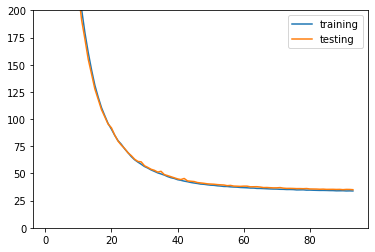

In [25]:
plt.plot(lcurve.Epoch, lcurve["training_cost"],label="training")
plt.plot(lcurve.Epoch, lcurve["test_cost"],label="testing")
plt.ylim(0,200)
plt.legend()

In [5]:
vae.load_model("model")

WARNING - From /data2/jerry/cs285_final_proj/image-compression/codes/VAE.py:61: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

WARNING - From /home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [6]:
selected_data=data[np.random.randint(0,10000,size=18)]
rec=np.array(vae.reconstruct(selected_data/255)*255,np.uint8)
sbs_original=np.moveaxis(np.array([selected_data,rec]),(0,1,-1),(1,0,2))
sbs=sbs_original.reshape((-1,)+data.shape[1:-1])

In [24]:
sbs_original.shape

(18, 2, 4, 84, 84)

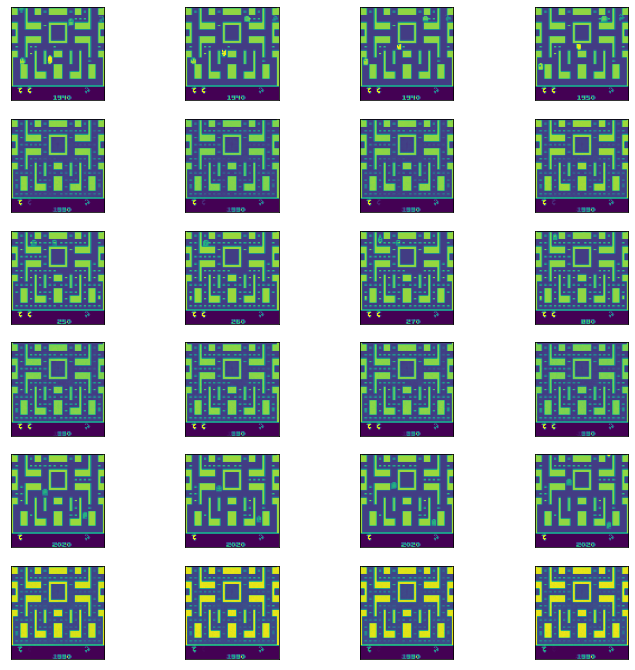

In [7]:
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(12, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, idx in zip(axs.flat, range(36)):
    ax.imshow(sbs[idx])


# plt.tight_layout()

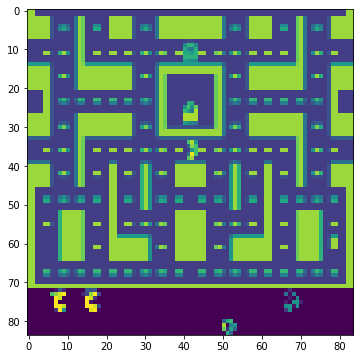

In [23]:
plt.figure(figsize=(6,6))
plt.imshow(sbs_original[10][0][3])

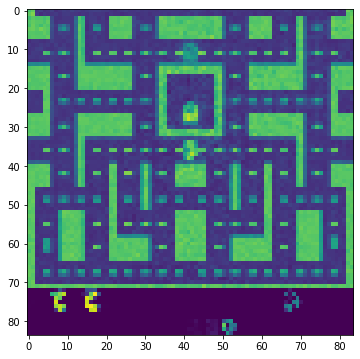

In [24]:
plt.figure(figsize=(6,6))
plt.imshow(sbs_original[10][1][3])